In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() 

In [2]:
elastic_net = pd.read_csv("./metrics/141_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/141_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/141_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/141_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/141_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/141_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/141_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/141_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.657145,1.508342,4.764774,2.182836,1.507824e+13,40.685698,0.401827
0,XGBoost,0.588269,1.800815,5.721965,2.392063,4.000094e+13,0.526766,0.039311
0,MLP,0.470146,2.059823,7.363562,2.713588,6.692566e+13,60.289400,0.019277
0,Decision Tree,0.414761,1.563925,8.133273,2.851889,8.140045e+12,0.643047,0.010785
0,Linear Regression,0.263504,2.565188,10.235337,3.199271,1.505610e+14,0.243864,0.008721
0,Elastic Net,0.167499,2.951749,11.569560,3.401406,1.554239e+14,0.073203,0.006991
0,Lasso,0.111382,3.103075,12.349438,3.514177,1.556248e+14,0.075007,0.007033
0,Logistic Regression,-0.460208,2.855563,20.293020,4.504777,1.570550e+14,5.176189,0.011509


In [6]:
metrics.to_csv("./metrics/142_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


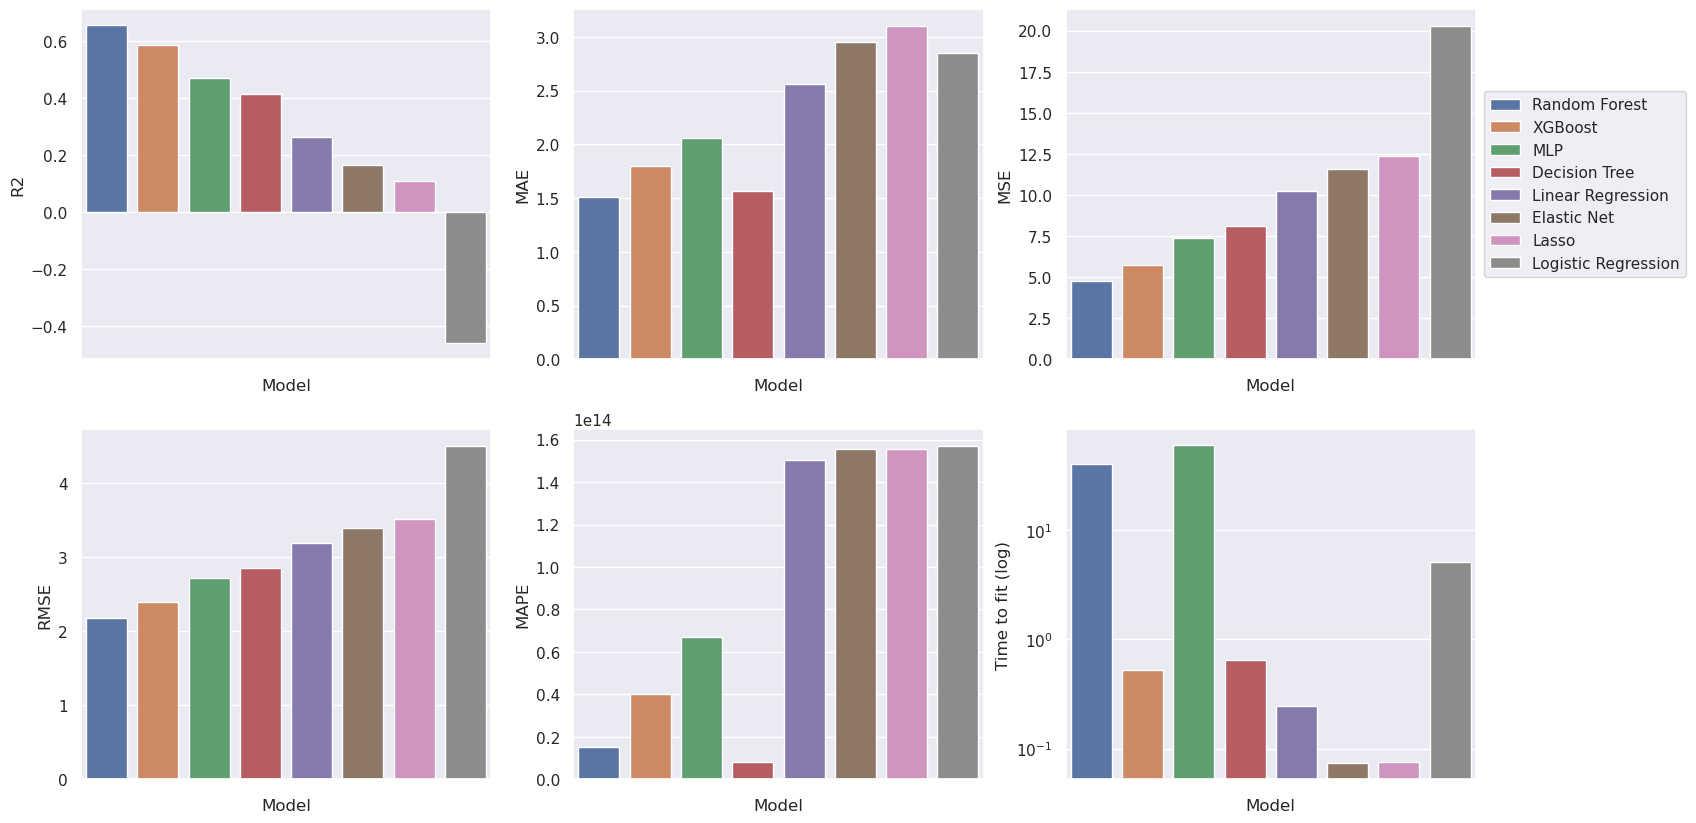

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/142_yonge_flow_weather_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/142_yonge_flow_weather_incidents_metrics.png",bbox_inches="tight")